<a href="https://colab.research.google.com/github/ImajiPietersz/FYP/blob/main/GAN_Experiment_Combine_NASA_Data_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"imajipietersz","key":"a867e2513f7abed17b6257011d4c5467"}'}

In [ ]:
!pip install kaggle
!ls -lha kaggle.json

!mkdir -p ~/.kaggle # creating .kaggle folder where the key should be placed
!cp kaggle.json ~/.kaggle/ # move the key to the folder
!pwd # checking the present working directory
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d vinayak123tyagi/bearing-dataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
-rw-r--r-- 1 root root 69 May 28 05:46 kaggle.json
/content
 99% 1.54G/1.56G [00:16<00:00, 138MB/s]
100% 1.56G/1.56G [00:16<00:00, 100MB/s]


In [ ]:
from zipfile import ZipFile
file_name = "bearing-dataset.zip"

with ZipFile(file_name, 'r') as zip1:
  zip1.extractall()
  print('Done')

Done


In [ ]:
import matplotlib.pyplot as plt
import scipy.io
import numpy as np
import pandas as pd
import os


In [ ]:
def compute_skewness(x):
    n = len(x)
    third_moment = np.sum((x - np.mean(x))**3) / n
    s_3 = np.std(x, ddof = 1) ** 3
    return third_moment/s_3

def compute_kurtosis(x):  
    n = len(x)
    fourth_moment = np.sum((x - np.mean(x))**4) / n
    s_4 = np.std(x, ddof = 1) ** 4
    return fourth_moment / s_4 - 3

In [ ]:
Time_feature_matrix=pd.DataFrame()
test_set=2
bearing_no=1
path='2nd_test/2nd_test'


In [ ]:
for filename in os.listdir(path):
    dataset=pd.read_csv(os.path.join(path, filename), sep='\t',header=None)
    bearing_data = np.array(dataset.iloc[:,bearing_no-1])
   
    feature_matrix=np.zeros((1,9))
    temp = bearing_data
    feature_matrix[0,0] = np.max(temp)
    feature_matrix[0,1] = np.min(temp)
    feature_matrix[0,2] = np.mean(temp)
    feature_matrix[0,3] = np.std(temp, ddof = 1)
    feature_matrix[0,4] = np.sqrt(np.mean(temp ** 2))
    feature_matrix[0,5] = compute_skewness(temp)
    feature_matrix[0,6] = compute_kurtosis(temp)
    feature_matrix[0,7] = feature_matrix[0,0]/feature_matrix[0,4]
    feature_matrix[0,8] = feature_matrix[0,4]/feature_matrix[0,2]
    
    df = pd.DataFrame(feature_matrix)
    df.index=[filename[:-3]]
    Time_feature_matrix = pd.concat([Time_feature_matrix, df], axis=0)

In [ ]:
Time_feature_matrix.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','Crest Factor','Form Factor']
Time_feature_matrix.index = pd.to_datetime(Time_feature_matrix.index, format='%Y.%m.%d.%H.%M')

Time_feature_matrix = Time_feature_matrix.sort_index()

In [ ]:
Time_feature_matrix

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2004-02-12 10:32:00,0.454,-0.386,-0.010196,0.073477,0.074179,0.083987,0.628408,6.120331,-7.275307
2004-02-12 10:42:00,0.369,-0.388,-0.002585,0.075340,0.075382,0.052138,0.647935,4.895038,-29.161382
2004-02-12 10:52:00,0.503,-0.400,-0.002484,0.076191,0.076230,0.032806,0.513132,6.598472,-30.688508
2004-02-12 11:02:00,0.608,-0.576,-0.002277,0.078693,0.078724,0.041483,1.157547,7.723217,-34.579322
2004-02-12 11:12:00,0.391,-0.391,-0.002404,0.078439,0.078474,0.028222,0.602825,4.982524,-32.645152
...,...,...,...,...,...,...,...,...,...
2004-02-19 05:42:00,4.998,-5.000,-0.002752,0.725014,0.725001,-0.510519,12.576183,6.893779,-263.426419
2004-02-19 05:52:00,2.688,-2.881,-0.004487,0.462001,0.462012,-0.325344,3.759312,5.818035,-102.977656
2004-02-19 06:02:00,3.501,-3.696,-0.001703,0.483844,0.483835,-0.377068,4.890985,7.235932,-284.094983
2004-02-19 06:12:00,0.005,0.000,0.001857,0.000987,0.002103,0.579656,3.636864,2.377543,1.132578


In [ ]:
# x is my training data
# mu is the mean
# std is the standard deviation
mu=0.0
std = 0.1
def gaussian_noise(x,mu,std):
    noise = np.random.normal(mu, std, size = x.shape)
    x_noisy = x + noise
    return x_noisy 

NOISY DATA

In [ ]:
noisy_df = gaussian_noise(Time_feature_matrix, mu,std)
noisy_df


,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2004-02-12 10:32:00,0.442114,-0.435382,-0.155846,-0.037156,0.080674,0.183937,0.642357,6.174699,-7.146596
2004-02-12 10:42:00,0.345918,-0.326320,-0.114466,0.033524,0.137277,0.075964,0.659608,4.898014,-29.043419
2004-02-12 10:52:00,0.420730,-0.318461,-0.006502,0.167832,0.010552,0.088059,0.481454,6.592373,-30.641293
2004-02-12 11:02:00,0.584399,-0.597780,0.067862,0.139284,0.154077,0.165951,1.137474,7.634540,-34.488487
2004-02-12 11:12:00,0.326962,-0.266934,0.054205,0.131447,0.086500,0.229642,0.552516,5.030641,-32.582855
...,...,...,...,...,...,...,...,...,...
2004-02-19 05:42:00,4.852288,-5.048235,-0.036814,0.643173,0.771788,-0.590944,12.637528,6.851726,-263.405149
2004-02-19 05:52:00,2.878147,-2.791778,-0.015828,0.357360,0.460819,-0.457161,3.864059,5.643168,-103.117397
2004-02-19 06:02:00,3.802499,-3.489413,-0.066985,0.451487,0.430172,-0.445986,4.976476,7.269090,-284.156793
2004-02-19 06:12:00,-0.071042,0.183230,-0.111050,-0.108164,0.074008,0.558429,3.628883,2.389972,1.219460


In [ ]:
# 1- pure
#0 - noisy

Time_feature_matrix = Time_feature_matrix.assign(target=1)
Time_feature_matrix = Time_feature_matrix.assign(target2=0)
Time_feature_matrix.head()

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,target,target2
2004-02-12 10:32:00,0.454,-0.386,-0.010196,0.073477,0.074179,0.083987,0.628408,6.120331,-7.275307,1,0
2004-02-12 10:42:00,0.369,-0.388,-0.002585,0.075340,0.075382,0.052138,0.647935,4.895038,-29.161382,1,0
2004-02-12 10:52:00,0.503,-0.400,-0.002484,0.076191,0.076230,0.032806,0.513132,6.598472,-30.688508,1,0
2004-02-12 11:02:00,0.608,-0.576,-0.002277,0.078693,0.078724,0.041483,1.157547,7.723217,-34.579322,1,0
2004-02-12 11:12:00,0.391,-0.391,-0.002404,0.078439,0.078474,0.028222,0.602825,4.982524,-32.645152,1,0


In [ ]:

Time_feature_matrix.dtypes

Max             float64
Min             float64
Mean            float64
Std             float64
RMS             float64
Skewness        float64
Kurtosis        float64
Crest Factor    float64
Form Factor     float64
target            int64
target2           int64
dtype: object

In [ ]:

noisy_df = noisy_df.assign(target=0)
noisy_df = noisy_df.assign(target2=1)
noisy_df.head()

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,target,target2
2004-02-12 10:32:00,0.442114,-0.435382,-0.155846,-0.037156,0.080674,0.183937,0.642357,6.174699,-7.146596,0,1
2004-02-12 10:42:00,0.345918,-0.326320,-0.114466,0.033524,0.137277,0.075964,0.659608,4.898014,-29.043419,0,1
2004-02-12 10:52:00,0.420730,-0.318461,-0.006502,0.167832,0.010552,0.088059,0.481454,6.592373,-30.641293,0,1
2004-02-12 11:02:00,0.584399,-0.597780,0.067862,0.139284,0.154077,0.165951,1.137474,7.634540,-34.488487,0,1
2004-02-12 11:12:00,0.326962,-0.266934,0.054205,0.131447,0.086500,0.229642,0.552516,5.030641,-32.582855,0,1


In [ ]:
from pandas.core.algorithms import IndexLabel
Mixed_set=pd.DataFrame()
Mixed_set = pd.concat([Time_feature_matrix,noisy_df ], axis=0)
Mixed_set = Mixed_set.reset_index(drop=True)
Mixed_set.head(6)

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,target,target2
0,0.454,-0.386,-0.010196,0.073477,0.074179,0.083987,0.628408,6.120331,-7.275307,1,0
1,0.369,-0.388,-0.002585,0.075340,0.075382,0.052138,0.647935,4.895038,-29.161382,1,0
2,0.503,-0.400,-0.002484,0.076191,0.076230,0.032806,0.513132,6.598472,-30.688508,1,0
3,0.608,-0.576,-0.002277,0.078693,0.078724,0.041483,1.157547,7.723217,-34.579322,1,0
4,0.391,-0.391,-0.002404,0.078439,0.078474,0.028222,0.602825,4.982524,-32.645152,1,0
5,0.439,-0.366,-0.001623,0.078300,0.078315,0.026851,0.455756,5.605593,-48.250169,1,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Mixed_set = pd.DataFrame(scaler.fit_transform(Mixed_set.values), columns=Mixed_set.columns)
Mixed_set

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,target,target2
0,0.099827,0.891191,0.425856,0.348372,0.289069,0.663076,0.144324,0.653500,0.836643,1.0,0.0
1,0.083666,0.890809,0.436612,0.350111,0.290296,0.641427,0.145563,0.487217,0.819258,1.0,0.0
2,0.109143,0.888515,0.436755,0.350906,0.291159,0.628286,0.137006,0.718388,0.818044,1.0,0.0
3,0.129107,0.854872,0.437048,0.353241,0.293701,0.634185,0.177912,0.871025,0.814954,1.0,0.0
4,0.087848,0.890235,0.436868,0.353004,0.293446,0.625171,0.142700,0.499090,0.816490,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1963,0.936077,0.000000,0.388238,0.880121,1.000000,0.204302,0.906636,0.752756,0.633186,0.0,1.0
1964,0.560732,0.431324,0.417896,0.613346,0.683092,0.295239,0.349716,0.588745,0.760511,0.0,1.0
1965,0.736479,0.297970,0.345599,0.701203,0.651860,0.302835,0.420330,0.809396,0.616702,0.0,1.0
1966,0.000000,1.000000,0.283323,0.178830,0.288895,0.985571,0.334787,0.147259,0.843391,0.0,1.0


In [ ]:
Mixed_set.columns

Index(['Max', 'Min', 'Mean', 'Std', 'RMS', 'Skewness', 'Kurtosis',
       'Crest Factor', 'Form Factor', 'target', 'target2'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
frames = Mixed_set[['Max', 'Min', 'Mean', 'Std', 'RMS', 'Skewness', 'Kurtosis','Crest Factor', 'Form Factor']].values
labels = Mixed_set[['target', 'target2']].values
train_data,test_data, train_labels, test_labels =  train_test_split(frames, labels,train_size=0.7, random_state=42 )
print(len(train_data))
print(len(test_data))
print(len(train_labels))
print(len(test_labels))

1377
591
1377
591


In [ ]:
def plotUsingAutoEncoder(model,df):
  
  denoised_all = []

  for _,frame in df.iterrows():
    row_array = frame.values[:9]
    encoded_data = model.encoder(np.array([row_array])).numpy()
    [values] = model.decoder(encoded_data).numpy()
    denoised_all.append(values)
  separated_max = [x[0] for x in denoised_all]
  separated_min = [x[1] for x in denoised_all]
  separated_mean = [x[2] for x in denoised_all]
  separated_std = [x[3] for x in denoised_all]
  separated_rms = [x[4] for x in denoised_all]
  separated_skewness = [x[5] for x in denoised_all]
  separated_kurtosis = [x[6] for x in denoised_all]
  separated_crest = [x[7] for x in denoised_all]
  separated_form = [x[8] for x in denoised_all]
  
  
  df['separated_max'] = pd.DataFrame(separated_max, columns=['separated_max']) 
  df['separated_min'] = pd.DataFrame(separated_min, columns=['separated_min'])
  df['separated_mean'] = pd.DataFrame(separated_mean, columns=['separated_mean']) 
  df['separated_std'] = pd.DataFrame(separated_std, columns=['separated_std']) 
  df['separated_rms'] = pd.DataFrame(separated_rms, columns=['separated_rms']) 
  df['separated_skewness'] = pd.DataFrame(separated_skewness, columns=['separated_skewness']) 
  df['separated_kurtosis'] = pd.DataFrame(separated_kurtosis, columns=['separated_kurtosis']) 
  df['separated_crest'] = pd.DataFrame(separated_crest, columns=['separated_crest']) 
  df['separated_form'] = pd.DataFrame(separated_form, columns=['separated_form'])
 
   
  scaler.fit(df.values)
  df = pd.DataFrame(scaler.inverse_transform(df.values), columns=df.columns)
  noise = df[['RMS']].values.flatten()
  seperated = df[['separated_rms']].values.flatten()

  plt.figure(figsize=(20,5)) 
  plt.plot(noise)
  plt.plot(seperated, color="red")
  plt.legend(labels=["Input", "Reconstruction" ])
  plt.show()


#*_With 1D 2 CNN Layers & 1 Dense Layer - Leaky ReLU activation function_*



In [ ]:
from keras.layers.activation.leaky_relu import LeakyReLU
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

class Discriminator(Model):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(9,)),
        tf.keras.layers.Reshape((9, 1)),  # Add a Reshape layer to prepare input for Conv1D
        tf.keras.layers.Conv1D(filters=9, kernel_size=3, activation="LeakyReLU"),  # Replace 2nd Dense layer with Conv1D
        tf.keras.layers.Conv1D(filters=4, kernel_size=3, activation="LeakyReLU"),  # Add another Conv1D layer 
        tf.keras.layers.Flatten(),  # Flatten the output of Conv1D for the next Dense layer
        tf.keras.layers.Dense(2,activation='softmax')
    ])

  def call(self, x):
    return self.model(x)

class Generator(Model):
  def __init__(self):
    super(Generator, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Reshape((9, 1)),  # Add a Reshape layer to prepare input for Conv1D
      tf.keras.layers.Conv1D(filters=9, kernel_size=3, activation="LeakyReLU"), 
      tf.keras.layers.Conv1D(filters=4, kernel_size=3, activation="LeakyReLU"), # Replace Dense layer with Conv1D
      tf.keras.layers.Flatten(), 
      tf.keras.layers.Dense(2, activation="LeakyReLU")
      ])
    

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(2, activation="LeakyReLU"),
      tf.keras.layers.Dense(4, activation="LeakyReLU"),
      tf.keras.layers.Dense(6, activation="LeakyReLU"),
      tf.keras.layers.Dense(9, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

generator = Generator()
discriminator = Discriminator()

generator.compile(optimizer='adam',loss = 'mae')
discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

discriminator.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = discriminator.fit(train_data, train_labels, epochs=30, validation_data=(test_data, test_labels))


Epoch 1/30
44/44 [==============================] - 3s 24ms/step - loss: 0.6964 - accuracy: 0.4982 - val_loss: 0.6924 - val_accuracy: 0.5296
Epoch 2/30
44/44 [==============================] - 1s 16ms/step - loss: 0.6935 - accuracy: 0.5069 - val_loss: 0.6922 - val_accuracy: 0.5871
Epoch 3/30
44/44 [==============================] - 1s 12ms/step - loss: 0.6929 - accuracy: 0.5265 - val_loss: 0.6925 - val_accuracy: 0.3875
Epoch 4/30
44/44 [==============================] - 0s 9ms/step - loss: 0.6930 - accuracy: 0.4176 - val_loss: 0.6926 - val_accuracy: 0.3858
Epoch 5/30
44/44 [==============================] - 0s 11ms/step - loss: 0.6933 - accuracy: 0.4706 - val_loss: 0.6928 - val_accuracy: 0.4535
Epoch 6/30
44/44 [==============================] - 0s 9ms/step - loss: 0.6927 - accuracy: 0.4742 - val_loss: 0.6926 - val_accuracy: 0.4467
Epoch 7/30
44/44 [==============================] - 0s 10ms/step - loss: 0.6925 - accuracy: 0.4924 - val_loss: 0.6926 - val_accuracy: 0.4772
Epoch 8/30
44/4

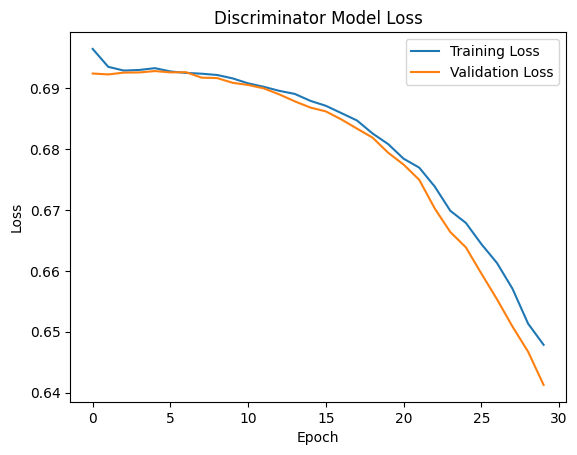

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Discriminator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
max_epochs = 3
learning_rate = 0.001
generator_optimizer = tf.optimizers.Adam(learning_rate)

Epoch 0 Starting
Epoch 0 DONE
Epoch 1 Starting
Epoch 1 DONE
Epoch 2 Starting
Epoch 2 DONE


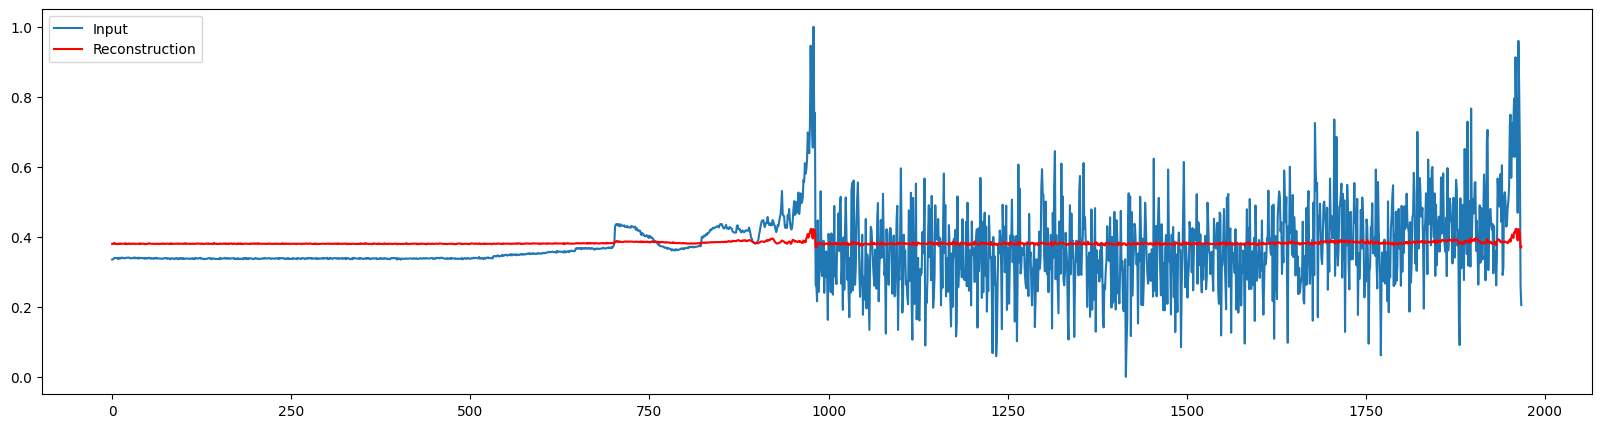

In [ ]:
step = 0
gen_losses = []
for epoch in range(max_epochs):
  print("Epoch " + str(epoch) +" Starting")

  for i in range (len(train_labels)):
    with tf.GradientTape() as gen_tape:
      output = generator(np.array([train_data[i]]))
      disc_output = discriminator(np.array(output))
      mae = tf.keras.losses.MeanAbsoluteError()
      gen_loss = mae(train_data[i], output[0]) * disc_output[0][0]
  
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
  gen_losses.append(gen_loss)
  
  print("Epoch " + str(epoch) +" DONE")

plotUsingAutoEncoder(generator,Mixed_set)

3


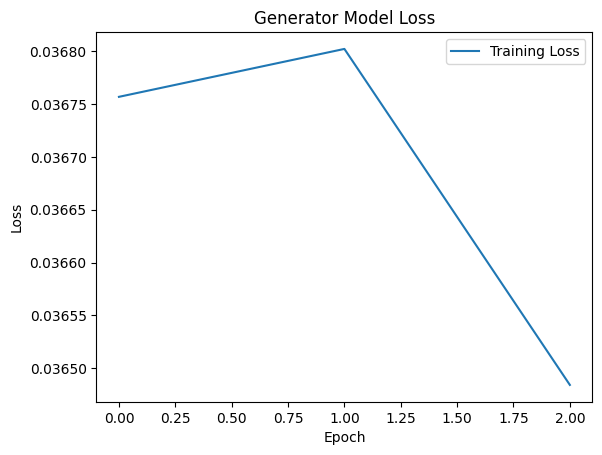

In [ ]:
plt.plot(gen_losses, label='Training Loss')
plt.title('Generator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
print(len(gen_losses))

In [ ]:
#Calculate SNR Value

noise =[]
generated = Mixed_set['separated_rms'][984:].values.tolist()   #generated signal
original = Mixed_set['RMS'][:984].values.tolist() #original signal
mixed = Mixed_set['RMS'][984:].values.tolist() # with noise
length = len(original)
for i in range(length):
  noise.append(original[i] - mixed[i])

snr = 10 * np.log10(np.mean(np.square(generated))/np.mean(np.square(noise)))
print(snr)

10.376753492441662


#*__With 1D 2 CNN Layers & 1 Dense Layer - Leaky ReLU activation function__*



In [ ]:
from keras.layers.activation.leaky_relu import LeakyReLU
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

class Discriminator(Model):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(9,)),
        tf.keras.layers.Reshape((9, 1)),  # Add a Reshape layer to prepare input for Conv1D
        tf.keras.layers.Conv1D(filters=16, kernel_size=3, activation="LeakyReLU"),  # Replace 2nd Dense layer with Conv1D
        tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="LeakyReLU"),  # Add another Conv1D layer
        tf.keras.layers.Flatten(),  # Flatten the output of Conv1D for the next Dense layer
        tf.keras.layers.Dense(2,activation='softmax')
    ])

  def call(self, x):
    return self.model(x)

class Generator(Model):
  def __init__(self):
    super(Generator, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Reshape((9, 1)),  # Add a Reshape layer to prepare input for Conv1D
      tf.keras.layers.Conv1D(filters=16, kernel_size=3, activation="LeakyReLU"), 
      tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="LeakyReLU"), # Replace Dense layer with Conv1D
      tf.keras.layers.Flatten(), 
      tf.keras.layers.Dense(2, activation="LeakyReLU")
      ])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(2, activation="LeakyReLU"),
      tf.keras.layers.Dense(8, activation="LeakyReLU"),
      tf.keras.layers.Dense(9, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

generator = Generator()
discriminator = Discriminator()

generator.compile(optimizer='adam',loss = 'mae')
discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

discriminator.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = discriminator.fit(train_data, train_labels, epochs=300, validation_data=(test_data, test_labels))


Epoch 1/300
44/44 [==============================] - 1s 8ms/step - loss: 0.6931 - accuracy: 0.5192 - val_loss: 0.6912 - val_accuracy: 0.5279
Epoch 2/300
44/44 [==============================] - 0s 3ms/step - loss: 0.6894 - accuracy: 0.5069 - val_loss: 0.6894 - val_accuracy: 0.5821
Epoch 3/300
44/44 [==============================] - 0s 4ms/step - loss: 0.6869 - accuracy: 0.6587 - val_loss: 0.6863 - val_accuracy: 0.6176
Epoch 4/300
44/44 [==============================] - 0s 4ms/step - loss: 0.6848 - accuracy: 0.6166 - val_loss: 0.6834 - val_accuracy: 0.6413
Epoch 5/300
44/44 [==============================] - 0s 3ms/step - loss: 0.6806 - accuracy: 0.5773 - val_loss: 0.6806 - val_accuracy: 0.7428
Epoch 6/300
44/44 [==============================] - 0s 3ms/step - loss: 0.6764 - accuracy: 0.6340 - val_loss: 0.6762 - val_accuracy: 0.6971
Epoch 7/300
44/44 [==============================] - 0s 4ms/step - loss: 0.6703 - accuracy: 0.7255 - val_loss: 0.6710 - val_accuracy: 0.7157
Epoch 8/300
4

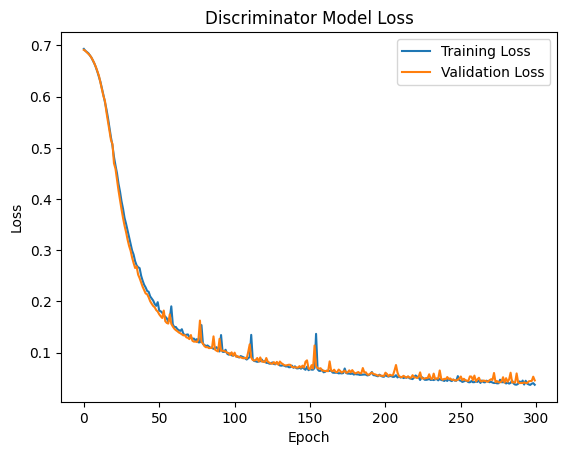

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Discriminator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
max_epochs = 10
learning_rate = 0.001
generator_optimizer = tf.optimizers.Adam(learning_rate)

Epoch 0 Starting
Epoch 0 DONE
Epoch 1 Starting
Epoch 1 DONE
Epoch 2 Starting
Epoch 2 DONE
Epoch 3 Starting
Epoch 3 DONE
Epoch 4 Starting
Epoch 4 DONE
Epoch 5 Starting
Epoch 5 DONE
Epoch 6 Starting
Epoch 6 DONE
Epoch 7 Starting
Epoch 7 DONE
Epoch 8 Starting
Epoch 8 DONE
Epoch 9 Starting
Epoch 9 DONE


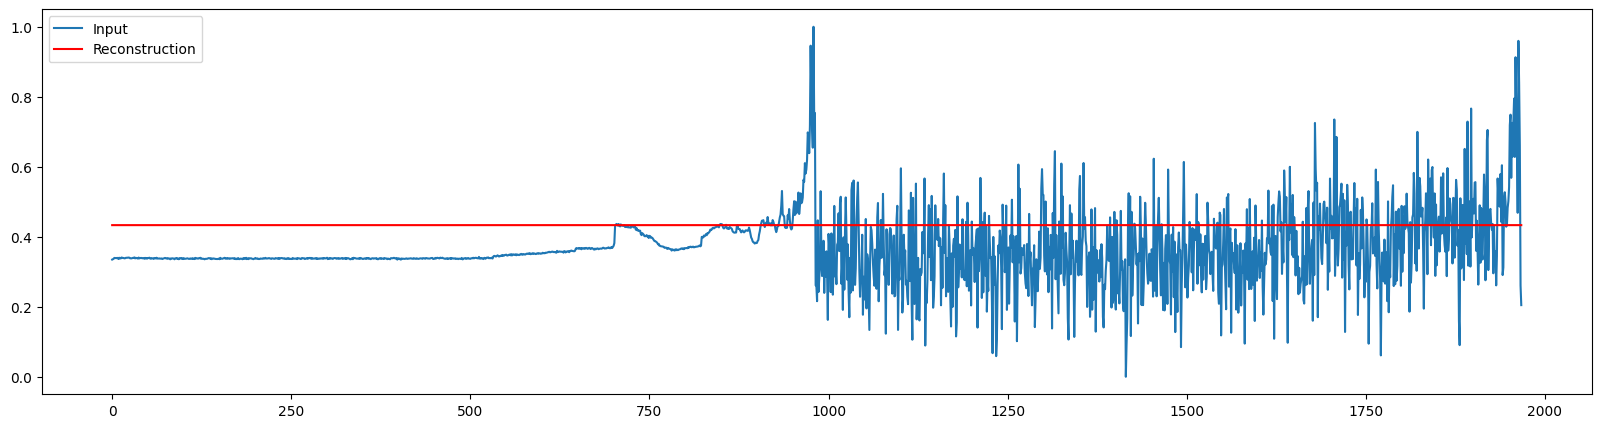

In [ ]:
step = 0
gen_losses = []
for epoch in range(max_epochs):
  print("Epoch " + str(epoch) +" Starting")

  for i in range (len(train_labels)):
    with tf.GradientTape() as gen_tape:
      output = generator(np.array([train_data[i]]))
      disc_output = discriminator(np.array(output))
      mae = tf.keras.losses.MeanAbsoluteError()
      gen_loss = mae(train_data[i], output[0]) * disc_output[0][0]
  
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
  gen_losses.append(gen_loss)
  
  print("Epoch " + str(epoch) +" DONE")

plotUsingAutoEncoder(generator,Mixed_set)

10


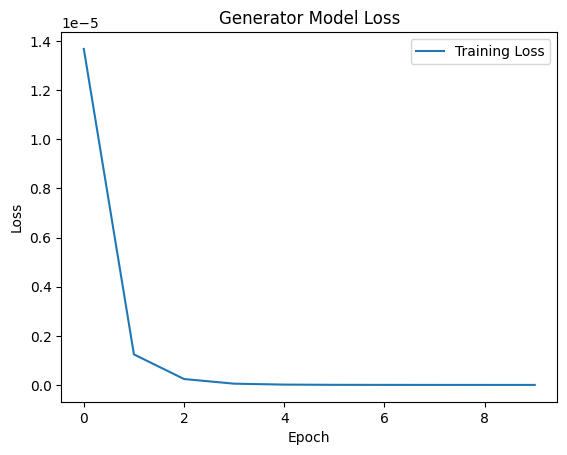

In [ ]:
plt.plot(gen_losses, label='Training Loss')
plt.title('Generator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
print(len(gen_losses))

In [ ]:
#Calculate SNR Value

noise =[]
generated = Mixed_set['separated_rms'][984:].values.tolist()   #generated signal
original = Mixed_set['RMS'][:984].values.tolist() #original signal
mixed = Mixed_set['RMS'][984:].values.tolist() # with noise
length = len(original)
for i in range(length):
  noise.append(original[i] - mixed[i])

snr = 10 * np.log10(np.mean(np.square(generated))/np.mean(np.square(noise)))
print(snr)

12.084759335942312


#*_With 1D 2 CNN Layers & 2 Dense Layer - Leaky ReLU activation function_*



In [ ]:
from keras.layers.activation.leaky_relu import LeakyReLU
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

class Discriminator(Model):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(9,)),
        tf.keras.layers.Reshape((9, 1)),  # Add a Reshape layer to prepare input for Conv1D
        tf.keras.layers.Conv1D(filters=9, kernel_size=3, activation="LeakyReLU"),  # Replace 2nd Dense layer with Conv1D
        tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"),  # Add another Conv1D layer 
        tf.keras.layers.Flatten(),  # Flatten the output of Conv1D for the next Dense layer
        tf.keras.layers.Dense(6,activation='LeakyReLU'),
        tf.keras.layers.Dense(2,activation='softmax'),
    ])

  def call(self, x):
    return self.model(x)

class Generator(Model):
  def __init__(self):
    super(Generator, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Reshape((9, 1)),  # Add a Reshape layer to prepare input for Conv1D
      tf.keras.layers.Conv1D(filters=9, kernel_size=3, activation="LeakyReLU"), 
      tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"), # Replace Dense layer with Conv1D
      tf.keras.layers.Flatten(), 
      tf.keras.layers.Dense(6, activation="LeakyReLU"),
      tf.keras.layers.Dense(2, activation="LeakyReLU")
      ])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(2, activation="LeakyReLU"),
      tf.keras.layers.Dense(6, activation="LeakyReLU"),
      tf.keras.layers.Dense(8, activation="LeakyReLU"),
      tf.keras.layers.Dense(9, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

generator = Generator()
discriminator = Discriminator()

generator.compile(optimizer='adam',loss = 'mae')
discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

discriminator.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = discriminator.fit(train_data, train_labels, epochs=300, validation_data=(test_data, test_labels))


Epoch 1/300
44/44 [==============================] - 2s 10ms/step - loss: 0.6932 - accuracy: 0.4909 - val_loss: 0.6926 - val_accuracy: 0.4924
Epoch 2/300
44/44 [==============================] - 0s 4ms/step - loss: 0.6921 - accuracy: 0.4916 - val_loss: 0.6917 - val_accuracy: 0.4738
Epoch 3/300
44/44 [==============================] - 0s 4ms/step - loss: 0.6915 - accuracy: 0.5113 - val_loss: 0.6913 - val_accuracy: 0.4585
Epoch 4/300
44/44 [==============================] - 0s 4ms/step - loss: 0.6905 - accuracy: 0.5004 - val_loss: 0.6902 - val_accuracy: 0.4822
Epoch 5/300
44/44 [==============================] - 0s 3ms/step - loss: 0.6891 - accuracy: 0.4808 - val_loss: 0.6883 - val_accuracy: 0.4687
Epoch 6/300
44/44 [==============================] - 0s 4ms/step - loss: 0.6863 - accuracy: 0.5134 - val_loss: 0.6860 - val_accuracy: 0.4788
Epoch 7/300
44/44 [==============================] - 0s 3ms/step - loss: 0.6832 - accuracy: 0.4808 - val_loss: 0.6827 - val_accuracy: 0.4569
Epoch 8/300


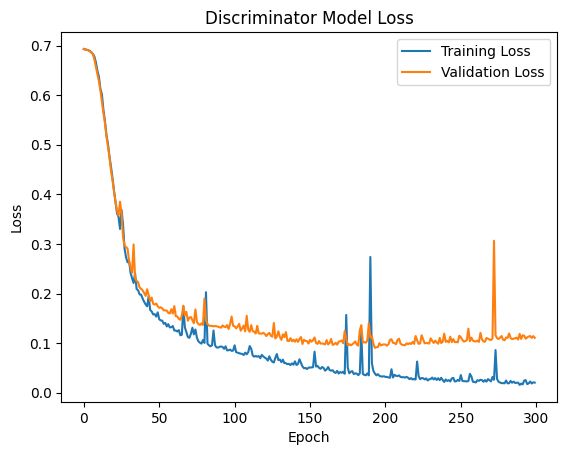

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Discriminator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
max_epochs = 10
learning_rate = 0.001
generator_optimizer = tf.optimizers.Adam(learning_rate)

Epoch 0 Starting
Epoch 0 DONE
Epoch 1 Starting
Epoch 1 DONE
Epoch 2 Starting
Epoch 2 DONE
Epoch 3 Starting
Epoch 3 DONE
Epoch 4 Starting
Epoch 4 DONE
Epoch 5 Starting
Epoch 5 DONE
Epoch 6 Starting
Epoch 6 DONE
Epoch 7 Starting
Epoch 7 DONE
Epoch 8 Starting
Epoch 8 DONE
Epoch 9 Starting
Epoch 9 DONE


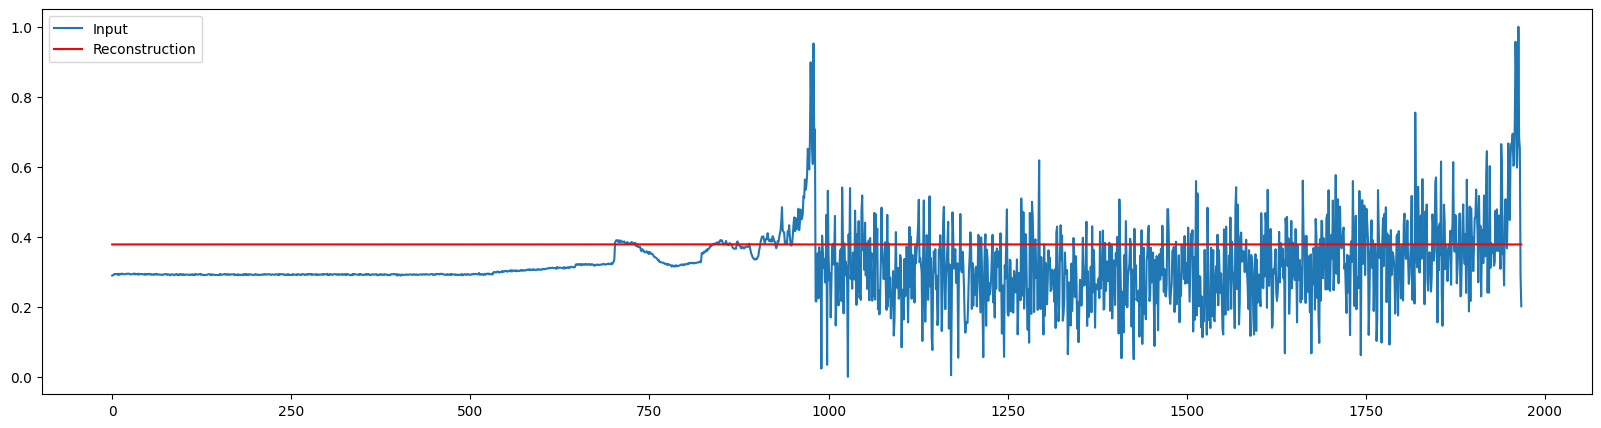

In [ ]:
step = 0
gen_losses = []
for epoch in range(max_epochs):
  print("Epoch " + str(epoch) +" Starting")

  for i in range (len(train_labels)):
    with tf.GradientTape() as gen_tape:
      output = generator(np.array([train_data[i]]))
      disc_output = discriminator(np.array(output))
      mae = tf.keras.losses.MeanAbsoluteError()
      gen_loss = mae(train_data[i], output[0]) * disc_output[0][0]
  
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
  gen_losses.append(gen_loss)
  
  print("Epoch " + str(epoch) +" DONE")

plotUsingAutoEncoder(generator,Mixed_set)

10


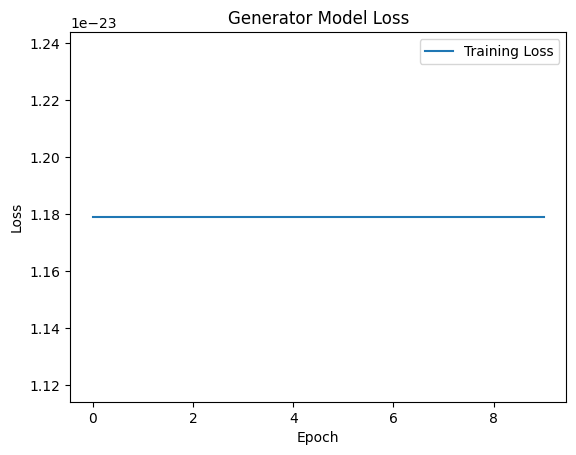

In [ ]:
plt.plot(gen_losses, label='Training Loss')
plt.title('Generator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
print(len(gen_losses))

In [ ]:
#Calculate SNR Value

noise =[]
generated = Mixed_set['separated_rms'][984:].values.tolist()   #generated signal
original = Mixed_set['RMS'][:984].values.tolist() #original signal
mixed = Mixed_set['RMS'][984:].values.tolist() # with noise
length = len(original)
for i in range(length):
  noise.append(original[i] - mixed[i])

snr = 10 * np.log10(np.mean(np.square(generated))/np.mean(np.square(noise)))
print(snr)

11.521929764369947


#*_With 1D 2 CNN Layers & 2 Dense Layer - Leaky ReLU activation function_*



In [ ]:
from keras.layers.activation.leaky_relu import LeakyReLU
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

class Discriminator(Model):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(9,)),
        tf.keras.layers.Reshape((9, 1)),  # Add a Reshape layer to prepare input for Conv1D
        tf.keras.layers.Conv1D(filters=16, kernel_size=3, activation="LeakyReLU"),  # Replace 2nd Dense layer with Conv1D
        tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="LeakyReLU"),  # Add another Conv1D layer 
        tf.keras.layers.Flatten(),  # Flatten the output of Conv1D for the next Dense layer
        tf.keras.layers.Dense(5,activation='LeakyReLU'),
        tf.keras.layers.Dense(2,activation='softmax')
    ])

  def call(self, x):
    return self.model(x)

class Generator(Model):
  def __init__(self):
    super(Generator, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Reshape((9, 1)),  # Add a Reshape layer to prepare input for Conv1D
      tf.keras.layers.Conv1D(filters=16, kernel_size=3, activation="LeakyReLU"), 
      tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="LeakyReLU"), # Replace Dense layer with Conv1D
      tf.keras.layers.Flatten(), 
      tf.keras.layers.Dense(5, activation="LeakyReLU"),
      tf.keras.layers.Dense(2, activation="LeakyReLU")
      ])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(2, activation="LeakyReLU"),
      tf.keras.layers.Dense(5, activation="LeakyReLU"),
      tf.keras.layers.Dense(8, activation="LeakyReLU"),
      tf.keras.layers.Dense(9, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

generator = Generator()
discriminator = Discriminator()

generator.compile(optimizer='adam',loss = 'mae')
discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

discriminator.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = discriminator.fit(train_data, train_labels, epochs=300, validation_data=(test_data, test_labels))


Epoch 1/300
44/44 [==============================] - 1s 8ms/step - loss: 0.6925 - accuracy: 0.5192 - val_loss: 0.6912 - val_accuracy: 0.4044
Epoch 2/300
44/44 [==============================] - 0s 5ms/step - loss: 0.6921 - accuracy: 0.5069 - val_loss: 0.6902 - val_accuracy: 0.6261
Epoch 3/300
44/44 [==============================] - 0s 5ms/step - loss: 0.6885 - accuracy: 0.5919 - val_loss: 0.6886 - val_accuracy: 0.4518
Epoch 4/300
44/44 [==============================] - 0s 5ms/step - loss: 0.6880 - accuracy: 0.4742 - val_loss: 0.6864 - val_accuracy: 0.4264
Epoch 5/300
44/44 [==============================] - 0s 5ms/step - loss: 0.6853 - accuracy: 0.6267 - val_loss: 0.6830 - val_accuracy: 0.7225
Epoch 6/300
44/44 [==============================] - 0s 5ms/step - loss: 0.6819 - accuracy: 0.6558 - val_loss: 0.6863 - val_accuracy: 0.4535
Epoch 7/300
44/44 [==============================] - 0s 6ms/step - loss: 0.6811 - accuracy: 0.5512 - val_loss: 0.6774 - val_accuracy: 0.6920
Epoch 8/300
4

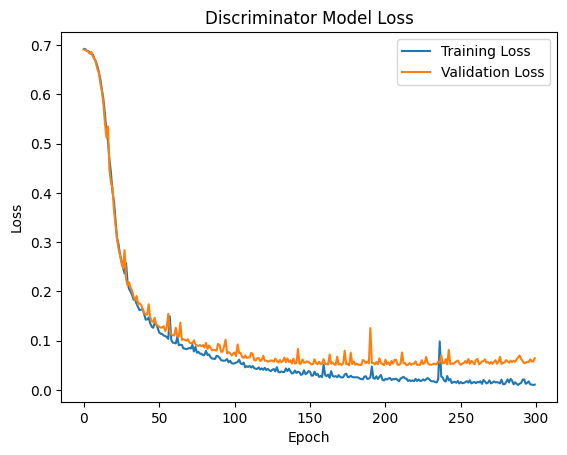

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Discriminator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
max_epochs = 10
learning_rate = 0.001
generator_optimizer = tf.optimizers.Adam(learning_rate)

Epoch 0 Starting
Epoch 0 DONE
Epoch 1 Starting
Epoch 1 DONE
Epoch 2 Starting
Epoch 2 DONE
Epoch 3 Starting
Epoch 3 DONE
Epoch 4 Starting
Epoch 4 DONE
Epoch 5 Starting
Epoch 5 DONE
Epoch 6 Starting
Epoch 6 DONE
Epoch 7 Starting
Epoch 7 DONE
Epoch 8 Starting
Epoch 8 DONE
Epoch 9 Starting
Epoch 9 DONE


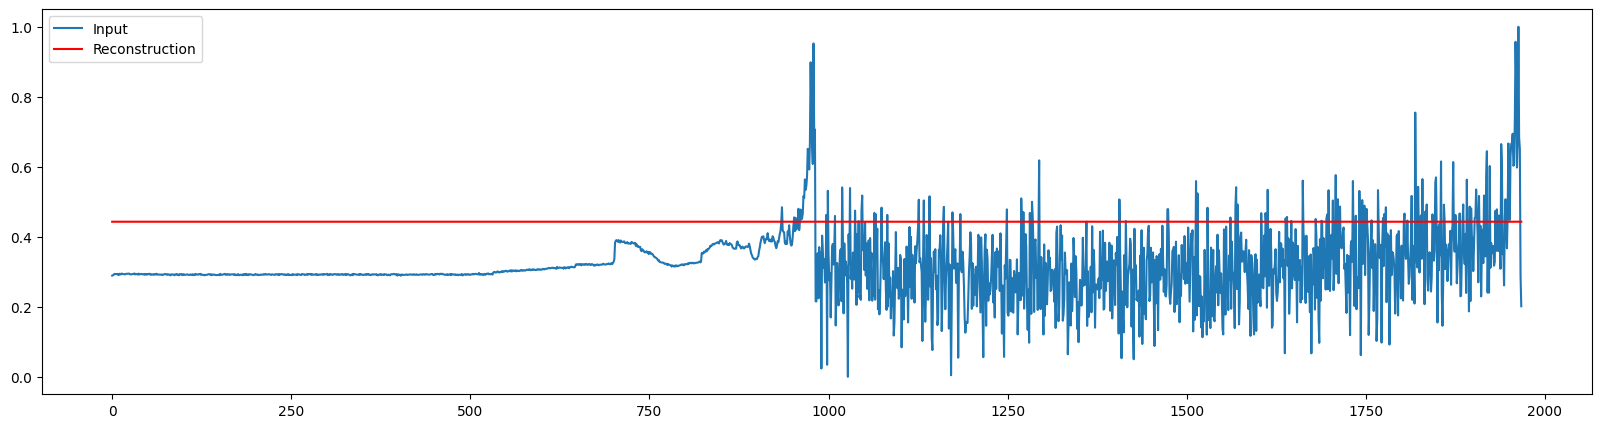

In [ ]:
step = 0
gen_losses = []
for epoch in range(max_epochs):
  print("Epoch " + str(epoch) +" Starting")

  for i in range (len(train_labels)):
    with tf.GradientTape() as gen_tape:
      output = generator(np.array([train_data[i]]))
      disc_output = discriminator(np.array(output))
      mae = tf.keras.losses.MeanAbsoluteError()
      gen_loss = mae(train_data[i], output[0]) * disc_output[0][0]
  
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
  gen_losses.append(gen_loss)
  
  print("Epoch " + str(epoch) +" DONE")

plotUsingAutoEncoder(generator,Mixed_set)

10


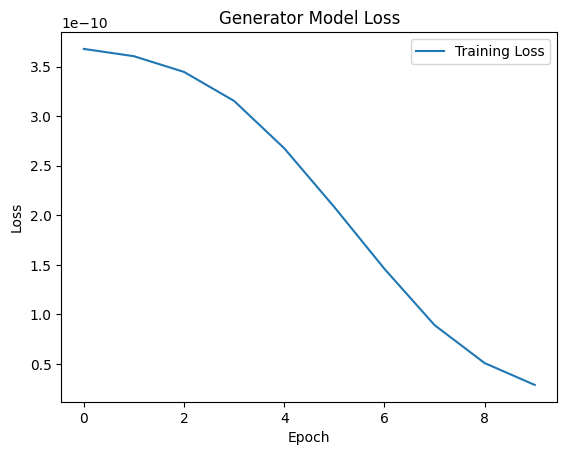

In [ ]:
plt.plot(gen_losses, label='Training Loss')
plt.title('Generator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
print(len(gen_losses))

In [ ]:
#Calculate SNR Value

noise =[]
generated = Mixed_set['separated_rms'][984:].values.tolist()   #generated signal
original = Mixed_set['RMS'][:984].values.tolist() #original signal
mixed = Mixed_set['RMS'][984:].values.tolist() # with noise
length = len(original)
for i in range(length):
  noise.append(original[i] - mixed[i])

snr = 10 * np.log10(np.mean(np.square(generated))/np.mean(np.square(noise)))
print(snr)

12.833043986537064


#*__With 1D 3 CNN Layers & 1 Dense Layer - Leaky ReLU activation function__*



In [ ]:
from keras.layers.activation.leaky_relu import LeakyReLU
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

class Discriminator(Model):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(9,)),
        tf.keras.layers.Reshape((9, 1)),  # Add a Reshape layer to prepare input for Conv1D
        tf.keras.layers.Conv1D(filters=9, kernel_size=3, activation="LeakyReLU"),  # Replace 2nd Dense layer with Conv1D
        tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"),  # Add another Conv1D layer
        tf.keras.layers.Conv1D(filters=6, kernel_size=3, activation="LeakyReLU"), 
        tf.keras.layers.Flatten(),  # Flatten the output of Conv1D for the next Dense layer
        tf.keras.layers.Dense(2,activation='softmax')
    ])

  def call(self, x):
    return self.model(x)

class Generator(Model):
  def __init__(self):
    super(Generator, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Reshape((9, 1)),  # Add a Reshape layer to prepare input for Conv1D
      tf.keras.layers.Conv1D(filters=9, kernel_size=3, activation="LeakyReLU"), 
      tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"), # Replace Dense layer with Conv1D
      tf.keras.layers.Conv1D(filters=6, kernel_size=3, activation="LeakyReLU"),
      tf.keras.layers.Flatten(), 
      tf.keras.layers.Dense(2, activation="LeakyReLU")
      ])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(2, activation="LeakyReLU"),
      tf.keras.layers.Dense(6, activation="LeakyReLU"),
      tf.keras.layers.Dense(8, activation="LeakyReLU"),
      tf.keras.layers.Dense(9, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

generator = Generator()
discriminator = Discriminator()

generator.compile(optimizer='adam',loss = 'mae')
discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

discriminator.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = discriminator.fit(train_data, train_labels, epochs=300, validation_data=(test_data, test_labels))


Epoch 1/300
44/44 [==============================] - 1s 11ms/step - loss: 0.6924 - accuracy: 0.5113 - val_loss: 0.6899 - val_accuracy: 0.6785
Epoch 2/300
44/44 [==============================] - 0s 6ms/step - loss: 0.6884 - accuracy: 0.6369 - val_loss: 0.6871 - val_accuracy: 0.4687
Epoch 3/300
44/44 [==============================] - 0s 6ms/step - loss: 0.6867 - accuracy: 0.5396 - val_loss: 0.6861 - val_accuracy: 0.4788
Epoch 4/300
44/44 [==============================] - 0s 6ms/step - loss: 0.6826 - accuracy: 0.6166 - val_loss: 0.6804 - val_accuracy: 0.6667
Epoch 5/300
44/44 [==============================] - 0s 6ms/step - loss: 0.6774 - accuracy: 0.6885 - val_loss: 0.6756 - val_accuracy: 0.5262
Epoch 6/300
44/44 [==============================] - 0s 6ms/step - loss: 0.6723 - accuracy: 0.6195 - val_loss: 0.6683 - val_accuracy: 0.6176
Epoch 7/300
44/44 [==============================] - 0s 6ms/step - loss: 0.6621 - accuracy: 0.7219 - val_loss: 0.6562 - val_accuracy: 0.7817
Epoch 8/300


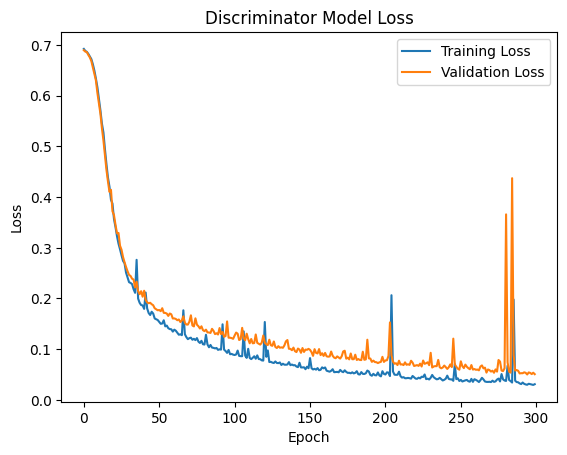

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Discriminator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
max_epochs = 10
learning_rate = 0.001
generator_optimizer = tf.optimizers.Adam(learning_rate)

Epoch 0 Starting
Epoch 0 DONE
Epoch 1 Starting
Epoch 1 DONE
Epoch 2 Starting
Epoch 2 DONE
Epoch 3 Starting
Epoch 3 DONE
Epoch 4 Starting
Epoch 4 DONE
Epoch 5 Starting
Epoch 5 DONE
Epoch 6 Starting
Epoch 6 DONE
Epoch 7 Starting
Epoch 7 DONE
Epoch 8 Starting
Epoch 8 DONE
Epoch 9 Starting
Epoch 9 DONE


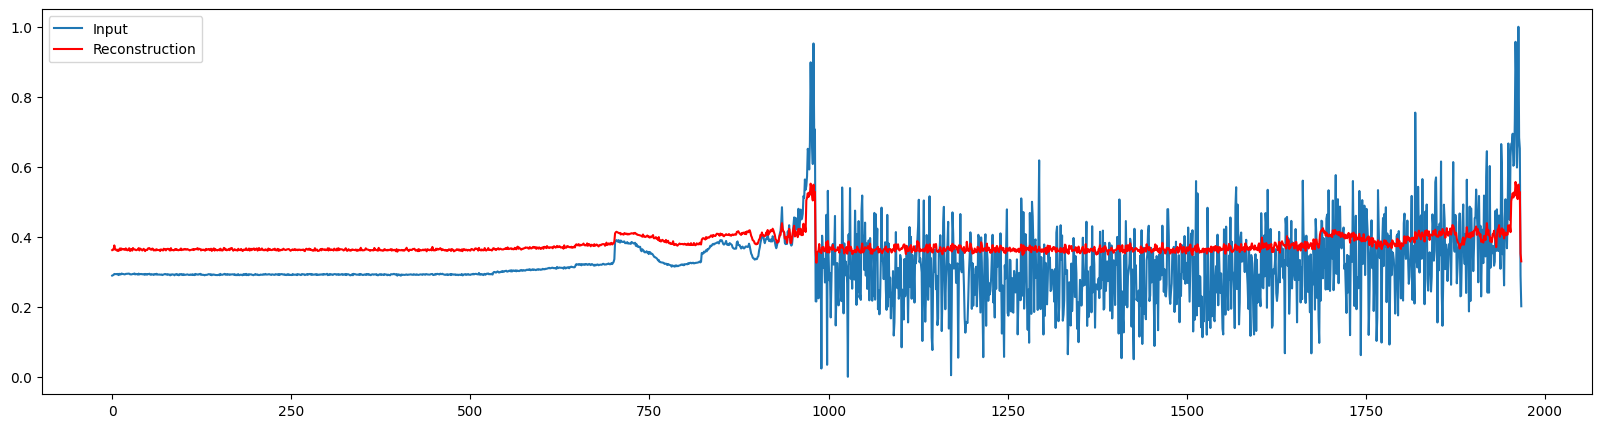

In [ ]:
step = 0
gen_losses = []
for epoch in range(max_epochs):
  print("Epoch " + str(epoch) +" Starting")

  for i in range (len(train_labels)):
    with tf.GradientTape() as gen_tape:
      output = generator(np.array([train_data[i]]))
      disc_output = discriminator(np.array(output))
      mae = tf.keras.losses.MeanAbsoluteError()
      gen_loss = mae(train_data[i], output[0]) * disc_output[0][0]
  
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
  gen_losses.append(gen_loss)
  
  print("Epoch " + str(epoch) +" DONE")

plotUsingAutoEncoder(generator,Mixed_set)

10


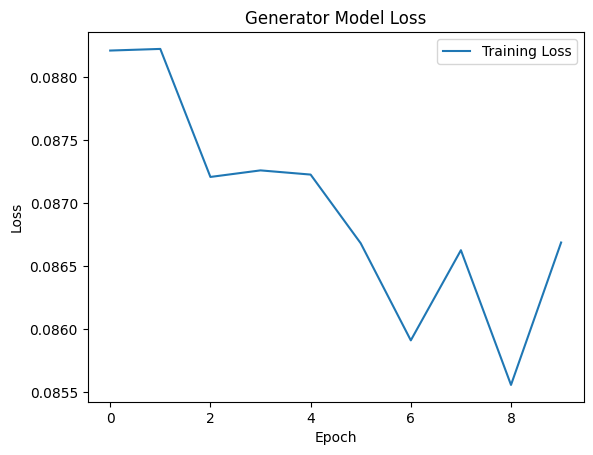

In [ ]:
plt.plot(gen_losses, label='Training Loss')
plt.title('Generator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
print(len(gen_losses))

In [ ]:
#Calculate SNR Value

noise =[]
generated = Mixed_set['separated_rms'][984:].values.tolist()   #generated signal
original = Mixed_set['RMS'][:984].values.tolist() #original signal
mixed = Mixed_set['RMS'][984:].values.tolist() # with noise
length = len(original)
for i in range(length):
  noise.append(original[i] - mixed[i])

snr = 10 * np.log10(np.mean(np.square(generated))/np.mean(np.square(noise)))
print(snr)

10.264726466769465


#*__With 1D 3 CNN Layers & 1 Dense Layer - Leaky ReLU activation function__*



In [ ]:
from keras.layers.activation.leaky_relu import LeakyReLU
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

class Discriminator(Model):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(9,)),
        tf.keras.layers.Reshape((9, 1)),  # Add a Reshape layer to prepare input for Conv1D
        tf.keras.layers.Conv1D(filters=16, kernel_size=3, activation="LeakyReLU"),  # Replace 2nd Dense layer with Conv1D
        tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="LeakyReLU"),  # Add another Conv1D layer
        tf.keras.layers.Conv1D(filters=5, kernel_size=3, activation="LeakyReLU"), 
        tf.keras.layers.Flatten(),  # Flatten the output of Conv1D for the next Dense layer
        tf.keras.layers.Dense(2,activation='softmax')
    ])

  def call(self, x):
    return self.model(x)

class Generator(Model):
  def __init__(self):
    super(Generator, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Reshape((9, 1)),  # Add a Reshape layer to prepare input for Conv1D
      tf.keras.layers.Conv1D(filters=9, kernel_size=3, activation="LeakyReLU"), 
      tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"), # Replace Dense layer with Conv1D
      tf.keras.layers.Conv1D(filters=6, kernel_size=3, activation="LeakyReLU"),
      tf.keras.layers.Flatten(), 
      tf.keras.layers.Dense(2, activation="LeakyReLU")
      ])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(2, activation="LeakyReLU"),
      tf.keras.layers.Dense(6, activation="LeakyReLU"),
      tf.keras.layers.Dense(8, activation="LeakyReLU"),
      tf.keras.layers.Dense(9, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

generator = Generator()
discriminator = Discriminator()

generator.compile(optimizer='adam',loss = 'mae')
discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

discriminator.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = discriminator.fit(train_data, train_labels, epochs=300, validation_data=(test_data, test_labels))


Epoch 1/300
44/44 [==============================] - 1s 8ms/step - loss: 0.6931 - accuracy: 0.5810 - val_loss: 0.6915 - val_accuracy: 0.7039
Epoch 2/300
44/44 [==============================] - 0s 4ms/step - loss: 0.6905 - accuracy: 0.5461 - val_loss: 0.6896 - val_accuracy: 0.7428
Epoch 3/300
44/44 [==============================] - 0s 4ms/step - loss: 0.6878 - accuracy: 0.5461 - val_loss: 0.6866 - val_accuracy: 0.8596
Epoch 4/300
44/44 [==============================] - 0s 5ms/step - loss: 0.6830 - accuracy: 0.7829 - val_loss: 0.6816 - val_accuracy: 0.8646
Epoch 5/300
44/44 [==============================] - 0s 4ms/step - loss: 0.6766 - accuracy: 0.8228 - val_loss: 0.6739 - val_accuracy: 0.8494
Epoch 6/300
44/44 [==============================] - 0s 4ms/step - loss: 0.6662 - accuracy: 0.8497 - val_loss: 0.6611 - val_accuracy: 0.8308
Epoch 7/300
44/44 [==============================] - 0s 3ms/step - loss: 0.6488 - accuracy: 0.8359 - val_loss: 0.6409 - val_accuracy: 0.8579
Epoch 8/300
4

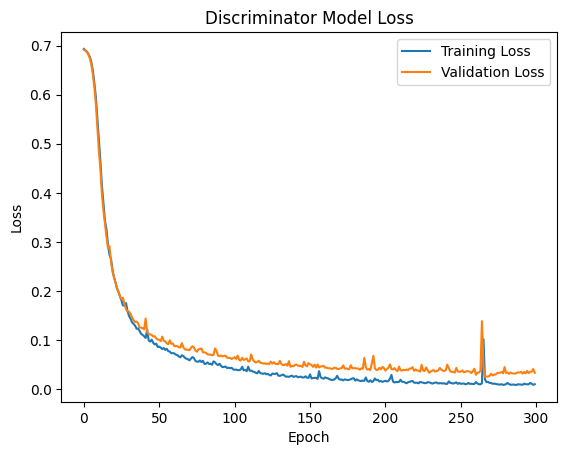

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Discriminator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
max_epochs = 10
learning_rate = 0.001
generator_optimizer = tf.optimizers.Adam(learning_rate)

Epoch 0 Starting
Epoch 0 DONE
Epoch 1 Starting
Epoch 1 DONE
Epoch 2 Starting
Epoch 2 DONE
Epoch 3 Starting
Epoch 3 DONE
Epoch 4 Starting
Epoch 4 DONE
Epoch 5 Starting
Epoch 5 DONE
Epoch 6 Starting
Epoch 6 DONE
Epoch 7 Starting
Epoch 7 DONE
Epoch 8 Starting
Epoch 8 DONE
Epoch 9 Starting
Epoch 9 DONE


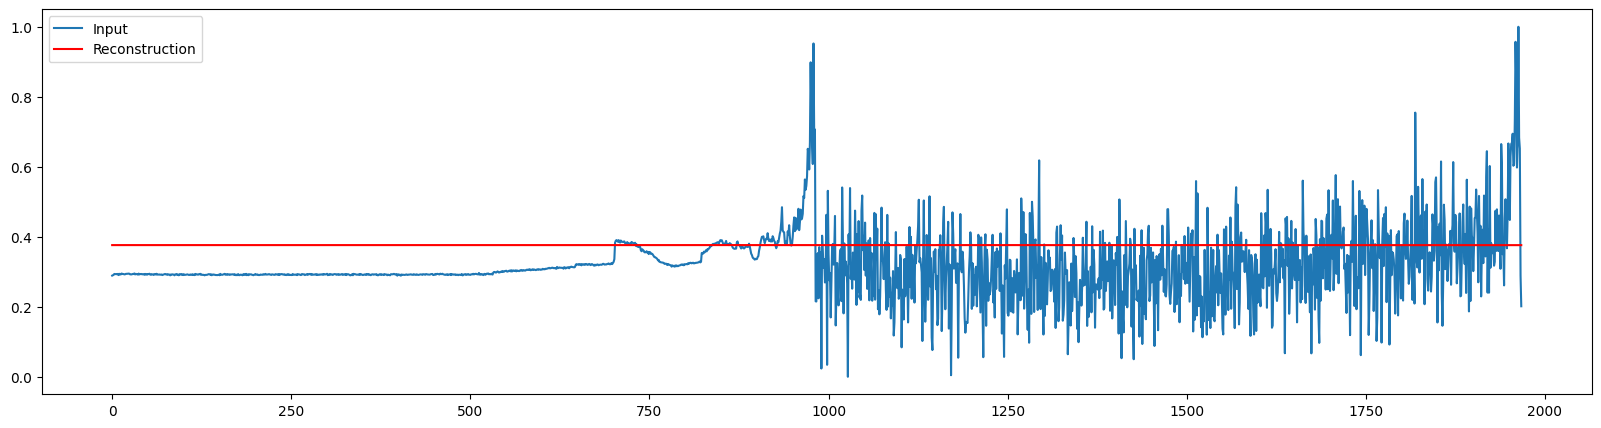

In [41]:
step = 0
gen_losses = []
for epoch in range(max_epochs):
  print("Epoch " + str(epoch) +" Starting")

  for i in range (len(train_labels)):
    with tf.GradientTape() as gen_tape:
      output = generator(np.array([train_data[i]]))
      disc_output = discriminator(np.array(output))
      mae = tf.keras.losses.MeanAbsoluteError()
      gen_loss = mae(train_data[i], output[0]) * disc_output[0][0]
  
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
  gen_losses.append(gen_loss)
  
  print("Epoch " + str(epoch) +" DONE")

plotUsingAutoEncoder(generator,Mixed_set)

10


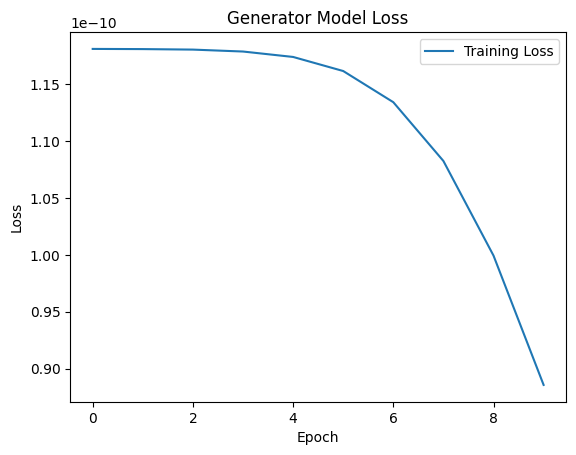

In [42]:
plt.plot(gen_losses, label='Training Loss')
plt.title('Generator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
print(len(gen_losses))

In [43]:
#Calculate SNR Value

noise =[]
generated = Mixed_set['separated_rms'][984:].values.tolist()   #generated signal
original = Mixed_set['RMS'][:984].values.tolist() #original signal
mixed = Mixed_set['RMS'][984:].values.tolist() # with noise
length = len(original)
for i in range(length):
  noise.append(original[i] - mixed[i])

snr = 10 * np.log10(np.mean(np.square(generated))/np.mean(np.square(noise)))
print(snr)

11.463902078987998


#*_With 1D 4 CNN Layers - Leaky ReLU activation function_*



In [ ]:
from keras.layers.activation.leaky_relu import LeakyReLU
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

class Discriminator(Model):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(9,)),
        tf.keras.layers.Reshape((9, 1)),  # Add a Reshape layer to prepare input for Conv1D
        tf.keras.layers.Conv1D(filters=9, kernel_size=3, activation="LeakyReLU"),  # Replace 2nd Dense layer with Conv1D
        tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"),  # Add another Conv1D layer
        tf.keras.layers.Conv1D(filters=5, kernel_size=3, activation="LeakyReLU"), 
        tf.keras.layers.Flatten(),  # Flatten the output of Conv1D for the next Dense layer
        tf.keras.layers.Dense(3,activation='LeakyReLU'),
        tf.keras.layers.Dense(2,activation='softmax')
    ])

  def call(self, x):
    return self.model(x)

class Generator(Model):
  def __init__(self):
    super(Generator, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Reshape((9, 1)),  # Add a Reshape layer to prepare input for Conv1D
      tf.keras.layers.Conv1D(filters=9, kernel_size=3, activation="LeakyReLU"), 
      tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"), # Replace Dense layer with Conv1D
      tf.keras.layers.Conv1D(filters=5, kernel_size=3, activation="LeakyReLU"),
      tf.keras.layers.Flatten(), 
      tf.keras.layers.Dense(3, activation="LeakyReLU"),
      tf.keras.layers.Dense(2, activation="LeakyReLU")
      ])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(2, activation="LeakyReLU"),
      tf.keras.layers.Dense(3, activation="LeakyReLU"),
      tf.keras.layers.Dense(5, activation="LeakyReLU"),
      tf.keras.layers.Dense(8, activation="LeakyReLU"),
      tf.keras.layers.Dense(9, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

generator = Generator()
discriminator = Discriminator()

generator.compile(optimizer='adam',loss = 'mae')
discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

discriminator.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = discriminator.fit(train_data, train_labels, epochs=300, validation_data=(test_data, test_labels))


Epoch 1/300
44/44 [==============================] - 5s 14ms/step - loss: 0.6930 - accuracy: 0.4953 - val_loss: 0.6914 - val_accuracy: 0.5093
Epoch 2/300
44/44 [==============================] - 0s 8ms/step - loss: 0.6915 - accuracy: 0.5468 - val_loss: 0.6909 - val_accuracy: 0.6802
Epoch 3/300
44/44 [==============================] - 0s 11ms/step - loss: 0.6907 - accuracy: 0.7262 - val_loss: 0.6899 - val_accuracy: 0.7343
Epoch 4/300
44/44 [==============================] - 0s 10ms/step - loss: 0.6893 - accuracy: 0.7160 - val_loss: 0.6880 - val_accuracy: 0.6464
Epoch 5/300
44/44 [==============================] - 1s 12ms/step - loss: 0.6873 - accuracy: 0.6739 - val_loss: 0.6853 - val_accuracy: 0.6379
Epoch 6/300
44/44 [==============================] - 1s 13ms/step - loss: 0.6842 - accuracy: 0.6216 - val_loss: 0.6831 - val_accuracy: 0.5313
Epoch 7/300
44/44 [==============================] - 0s 8ms/step - loss: 0.6829 - accuracy: 0.5969 - val_loss: 0.6754 - val_accuracy: 0.6481
Epoch 8/

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Discriminator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
max_epochs = 10
learning_rate = 0.001
generator_optimizer = tf.optimizers.Adam(learning_rate)

In [ ]:
step = 0
gen_losses = []
for epoch in range(max_epochs):
  print("Epoch " + str(epoch) +" Starting")

  for i in range (len(train_labels)):
    with tf.GradientTape() as gen_tape:
      output = generator(np.array([train_data[i]]))
      disc_output = discriminator(np.array(output))
      mae = tf.keras.losses.MeanAbsoluteError()
      gen_loss = mae(train_data[i], output[0]) * disc_output[0][0]
  
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
  gen_losses.append(gen_loss)
  
  print("Epoch " + str(epoch) +" DONE")

plotUsingAutoEncoder(generator,df)

In [ ]:
plt.plot(gen_losses, label='Training Loss')
plt.title('Generator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
print(len(gen_losses))

In [ ]:
#Calculate SNR Value

noise =[]
generated = Mixed_set['separated_rms'][984:].values.tolist()   #generated signal
original = Mixed_set['RMS'][:984].values.tolist() #original signal
mixed = Mixed_set['RMS'][984:].values.tolist() # with noise
length = len(original)
for i in range(length):
  noise.append(original[i] - mixed[i])

snr = 10 * np.log10(np.mean(np.square(generated))/np.mean(np.square(noise)))
print(snr)

#*__With 1D 3 CNN Layers & 2 Dense Layer - Leaky ReLU activation function__*



In [ ]:
from keras.layers.activation.leaky_relu import LeakyReLU
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

class Discriminator(Model):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(9,)),
        tf.keras.layers.Reshape((9, 1)),  # Add a Reshape layer to prepare input for Conv1D
        tf.keras.layers.Conv1D(filters=20, kernel_size=3, activation="LeakyReLU"),  # Replace 2nd Dense layer with Conv1D
        tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"),  # Add another Conv1D layer
        tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="LeakyReLU"), 
        tf.keras.layers.Flatten(),  # Flatten the output of Conv1D for the next Dense layer
        tf.keras.layers.Dense(5,activation='LeakyReLU'),
        tf.keras.layers.Dense(2,activation='softmax')
    ])

  def call(self, x):
    return self.model(x)

class Generator(Model):
  def __init__(self):
    super(Generator, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Reshape((9, 1)),  # Add a Reshape layer to prepare input for Conv1D
      tf.keras.layers.Conv1D(filters=20, kernel_size=3, activation="LeakyReLU"), 
      tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"), # Replace Dense layer with Conv1D
      tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="LeakyReLU"),
      tf.keras.layers.Flatten(), 
      tf.keras.layers.Dense(5, activation="LeakyReLU"),
      tf.keras.layers.Dense(2, activation="LeakyReLU")
      ])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(2, activation="LeakyReLU"),
      tf.keras.layers.Dense(5, activation="LeakyReLU"),
      tf.keras.layers.Dense(6, activation="LeakyReLU"),
      tf.keras.layers.Dense(8, activation="LeakyReLU"),
      tf.keras.layers.Dense(9, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

generator = Generator()
discriminator = Discriminator()

generator.compile(optimizer='adam',loss = 'mae')
discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

discriminator.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = discriminator.fit(train_data, train_labels, epochs=300, validation_data=(test_data, test_labels))


In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Discriminator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
max_epochs = 10
learning_rate = 0.001
generator_optimizer = tf.optimizers.Adam(learning_rate)

In [ ]:
step = 0
gen_losses = []
for epoch in range(max_epochs):
  print("Epoch " + str(epoch) +" Starting")

  for i in range (len(train_labels)):
    with tf.GradientTape() as gen_tape:
      output = generator(np.array([train_data[i]]))
      disc_output = discriminator(np.array(output))
      mae = tf.keras.losses.MeanAbsoluteError()
      gen_loss = mae(train_data[i], output[0]) * disc_output[0][0]
  
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
  gen_losses.append(gen_loss)
  
  print("Epoch " + str(epoch) +" DONE")

plotUsingAutoEncoder(generator,Mixed_set)

In [ ]:
plt.plot(gen_losses, label='Training Loss')
plt.title('Generator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
print(len(gen_losses))

In [ ]:
#Calculate SNR Value

noise =[]
generated = Mixed_set['separated_rms'][984:].values.tolist()   #generated signal
original = Mixed_set['RMS'][:984].values.tolist() #original signal
mixed = Mixed_set['RMS'][984:].values.tolist() # with noise
length = len(original)
for i in range(length):
  noise.append(original[i] - mixed[i])

snr = 10 * np.log10(np.mean(np.square(generated))/np.mean(np.square(noise)))
print(snr)

#*__With 1D 4 CNN Layers & 1 Dense Layer - Leaky ReLU activation function__*



In [ ]:
from keras.layers.activation.leaky_relu import LeakyReLU
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

class Discriminator(Model):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(9,)),
        tf.keras.layers.Reshape((9, 1)),  # Add a Reshape layer to prepare input for Conv1D
        tf.keras.layers.Conv1D(filters=9, kernel_size=3, activation="LeakyReLU"),  # Replace 2nd Dense layer with Conv1D
        tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"),  # Add another Conv1D layer
        tf.keras.layers.Conv1D(filters=5, kernel_size=3, activation="LeakyReLU"), 
        tf.keras.layers.Conv1D(filters=3, kernel_size=3, activation="LeakyReLU"), 
        tf.keras.layers.Flatten(),  # Flatten the output of Conv1D for the next Dense layer
        tf.keras.layers.Dense(2,activation='softmax')
    ])

  def call(self, x):
    return self.model(x)

class Generator(Model):
  def __init__(self):
    super(Generator, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Reshape((9, 1)),  # Add a Reshape layer to prepare input for Conv1D
      tf.keras.layers.Conv1D(filters=9, kernel_size=3, activation="LeakyReLU"), 
      tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"), # Replace Dense layer with Conv1D
      tf.keras.layers.Conv1D(filters=5, kernel_size=3, activation="LeakyReLU"),
      tf.keras.layers.Conv1D(filters=3, kernel_size=3, activation="LeakyReLU"),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(2, activation="LeakyReLU")
      ])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(2, activation="LeakyReLU"),
      tf.keras.layers.Dense(3, activation="LeakyReLU"),
      tf.keras.layers.Dense(5, activation="LeakyReLU"),
      tf.keras.layers.Dense(8, activation="LeakyReLU"),
      tf.keras.layers.Dense(9, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

generator = Generator()
discriminator = Discriminator()

generator.compile(optimizer='adam',loss = 'mae')
discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

discriminator.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = discriminator.fit(train_data, train_labels, epochs=300, validation_data=(test_data, test_labels))


In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Discriminator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
max_epochs = 10
learning_rate = 0.001
generator_optimizer = tf.optimizers.Adam(learning_rate)

In [ ]:
step = 0
gen_losses = []
for epoch in range(max_epochs):
  print("Epoch " + str(epoch) +" Starting")

  for i in range (len(train_labels)):
    with tf.GradientTape() as gen_tape:
      output = generator(np.array([train_data[i]]))
      disc_output = discriminator(np.array(output))
      mae = tf.keras.losses.MeanAbsoluteError()
      gen_loss = mae(train_data[i], output[0]) * disc_output[0][0]
  
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
  gen_losses.append(gen_loss)
  
  print("Epoch " + str(epoch) +" DONE")

plotUsingAutoEncoder(generator,Mixed_set)

In [ ]:
plt.plot(gen_losses, label='Training Loss')
plt.title('Generator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
print(len(gen_losses))

In [ ]:
#Calculate SNR Value

noise =[]
generated = Mixed_set['separated_rms'][984:].values.tolist()   #generated signal
original = Mixed_set['RMS'][:984].values.tolist() #original signal
mixed = Mixed_set['RMS'][984:].values.tolist() # with noise
length = len(original)
for i in range(length):
  noise.append(original[i] - mixed[i])

snr = 10 * np.log10(np.mean(np.square(generated))/np.mean(np.square(noise)))
print(snr)

#*__With 1D 4 CNN Layers & 1 Dense Layer - Leaky ReLU activation function__*



In [ ]:
from keras.layers.activation.leaky_relu import LeakyReLU
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

class Discriminator(Model):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(9,)),
        tf.keras.layers.Reshape((9, 1)),  # Add a Reshape layer to prepare input for Conv1D
        tf.keras.layers.Conv1D(filters=20, kernel_size=3, activation="LeakyReLU"),  # Replace 2nd Dense layer with Conv1D
        tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"),  # Add another Conv1D layer
        tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="LeakyReLU"), 
        tf.keras.layers.Conv1D(filters=5, kernel_size=3, activation="LeakyReLU"), 
        tf.keras.layers.Flatten(),  # Flatten the output of Conv1D for the next Dense layer
        tf.keras.layers.Dense(2,activation='softmax')
    ])

  def call(self, x):
    return self.model(x)

class Generator(Model):
  def __init__(self):
    super(Generator, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Reshape((9, 1)),  # Add a Reshape layer to prepare input for Conv1D
      tf.keras.layers.Conv1D(filters=20, kernel_size=3, activation="LeakyReLU"), 
      tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"), # Replace Dense layer with Conv1D
      tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="LeakyReLU"),
      tf.keras.layers.Conv1D(filters=5, kernel_size=3, activation="LeakyReLU"),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(2, activation="LeakyReLU")
      ])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(2, activation="LeakyReLU"),
      tf.keras.layers.Dense(5, activation="LeakyReLU"),
      tf.keras.layers.Dense(6, activation="LeakyReLU"),
      tf.keras.layers.Dense(8, activation="LeakyReLU"),
      tf.keras.layers.Dense(9, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

generator = Generator()
discriminator = Discriminator()

generator.compile(optimizer='adam',loss = 'mae')
discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

discriminator.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = discriminator.fit(train_data, train_labels, epochs=300, validation_data=(test_data, test_labels))


In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Discriminator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
max_epochs = 10
learning_rate = 0.001
generator_optimizer = tf.optimizers.Adam(learning_rate)

In [ ]:
step = 0
gen_losses = []
for epoch in range(max_epochs):
  print("Epoch " + str(epoch) +" Starting")

  for i in range (len(train_labels)):
    with tf.GradientTape() as gen_tape:
      output = generator(np.array([train_data[i]]))
      disc_output = discriminator(np.array(output))
      mae = tf.keras.losses.MeanAbsoluteError()
      gen_loss = mae(train_data[i], output[0]) * disc_output[0][0]
  
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
  gen_losses.append(gen_loss)
  
  print("Epoch " + str(epoch) +" DONE")

plotUsingAutoEncoder(generator,Mixed_set)

In [ ]:
plt.plot(gen_losses, label='Training Loss')
plt.title('Generator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
print(len(gen_losses))

In [ ]:
#Calculate SNR Value

noise =[]
generated = Mixed_set['separated_rms'][984:].values.tolist()   #generated signal
original = Mixed_set['RMS'][:984].values.tolist() #original signal
mixed = Mixed_set['RMS'][984:].values.tolist() # with noise
length = len(original)
for i in range(length):
  noise.append(original[i] - mixed[i])

snr = 10 * np.log10(np.mean(np.square(generated))/np.mean(np.square(noise)))
print(snr)